In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_enem_2023_original = pd.read_json('./enem_2023.json')

df_enem_2023 = df_enem_2023_original.dropna()
df_enem_2023 = df_enem_2023.rename(columns={"Linguagens": "Languages", "Ciências humanas": "Humanities", "Ciências da natureza": "Natural Sciences", "Matemática": "Mathematics", "Redação": "Essay","Sexo": "Gender"})
df_enem_2023['Gender'] = df_enem_2023['Gender'].replace({'Homem': 'Man', 'Mulher': 'Woman'})

In [3]:
df_enem_2023.head(10)

,Languages,Humanities,Natural Sciences,Mathematics,Essay,Gender
0,585.669300,686.512178,390.482473,452.281333,546.371706,Man
2,622.732384,495.510719,443.183580,669.683401,684.515750,Man
3,350.164605,602.041588,413.979810,676.608952,671.237114,Man
4,384.093657,489.249140,609.758123,520.426698,744.375048,Man
5,616.043360,502.007005,497.777935,615.902547,507.365147,Man
6,511.897593,479.197660,469.023899,441.139103,541.979136,Woman
7,377.439818,663.489624,556.239031,517.215575,635.424649,Woman
11,617.509514,685.004513,450.104243,556.460006,758.966704,Woman
14,447.988956,525.059975,351.735507,658.211529,716.065784,Man
18,475.352369,490.649377,442.433261,446.404701,688.692299,Man


In [4]:
def breadth(column):
    return df_enem_2023[column].max() - df_enem_2023[column].min()

def basic_statistics(column):
    average = df_enem_2023[column].mean()
    median = df_enem_2023[column].median()
    return average, median

def calculate_final_note(df):
    weights = {'Essay': 2, 'Mathematics': 4, 'Languages': 2, 'Humanities': 1, 'Natural Sciences': 1}
    return sum(df[col] * weight for col, weight in weights.items()) / sum(weights.values())

In [5]:
# Question 1: Breadth

disciplines = ['Essay', 'Mathematics', 'Languages', 'Humanities', 'Natural Sciences']
breadths = {discipline: breadth(discipline) for discipline in disciplines}

print("Breadth of disciplines:")
for discipline, breadth in breadths.items():
    print(f"- {discipline}: {breadth:.2f}") 

max_breadth = max(breadths, key=breadths.get)

print("-" * 50)

print(f"The subject with the highest breadth is: {max_breadth}")

Breadth of disciplines:
- Essay: 641.00
- Mathematics: 488.08
- Languages: 517.46
- Humanities: 474.02
- Natural Sciences: 487.60
--------------------------------------------------
The subject with the highest breadth is: Essay


In [6]:
# Question 2: Average and Median

statistics = {discipline: basic_statistics(discipline) for discipline in disciplines}

print("Average and median by subject:")
for discipline, stats in statistics.items():
    average = stats[0]
    median = stats[1]
    print(f"- {discipline}: Average = {average:.2f}, Median = {median:.2f}") 

Average and median by subject:
- Essay: Average = 641.19, Median = 639.60
- Mathematics: Average = 537.17, Median = 532.96
- Languages: Average = 517.47, Median = 517.13
- Humanities: Average = 528.35, Median = 528.50
- Natural Sciences: Average = 502.14, Median = 502.94


In [7]:
# Question 3: Top 500 in Computer Science

def calculate_final_note(df):
    weights = {
        'Essay': 2,
        'Mathematics': 4,
        'Languages': 2,
        'Humanities': 1,
        'Natural Sciences': 1
    }
    
    weighted_sum = (
        df['Essay'] * weights['Essay'] +
        df['Mathematics'] * weights['Mathematics'] +
        df['Languages'] * weights['Languages'] +
        df['Humanities'] * weights['Humanities'] +
        df['Natural Sciences'] * weights['Natural Sciences']
    )
    
    total_weights = sum(weights.values())
    return weighted_sum / total_weights

df_enem_2023['Final Note'] = calculate_final_note(df_enem_2023)
top_500 = df_enem_2023.nlargest(500, 'Final Note')
average_500 = top_500['Final Note'].mean()
deviation_500 = top_500['Final Note'].std()

print("Average and Standard Deviation of the top 500:")
print(f"- Average: {average_500:.2f}")
print(f"- Standard Deviation: {deviation_500:.2f}")

Average and Standard Deviation of the top 500:
- Average: 557.29
- Standard Deviation: 40.44


In [8]:
# Question 4: Top 40 in Computer Science

top_40 = top_500.nlargest(40, 'Final Note')
average_40 = top_40['Final Note'].mean()
variance_40 = top_40['Final Note'].var()

print("Average and variance of the top 40:")
print(f"- Average: {average_40:.2f}")
print(f"- Variance: {variance_40:.2f}")

Average and variance of the top 40:
- Average: 636.68
- Variance: 295.77


In [9]:
# Question 5: Third quartile (Q3)

Q3_mathematics = np.percentile(df_enem_2023['Mathematics'].dropna(), 75)
Q3_languages = np.percentile(df_enem_2023['Languages'].dropna(), 75)

print(f"Q3 Mathematics: {Q3_mathematics:.2f}")
print(f"Q3 Languages: {Q3_languages:.2f}")

Q3 Mathematics: 591.34
Q3 Languages: 572.65


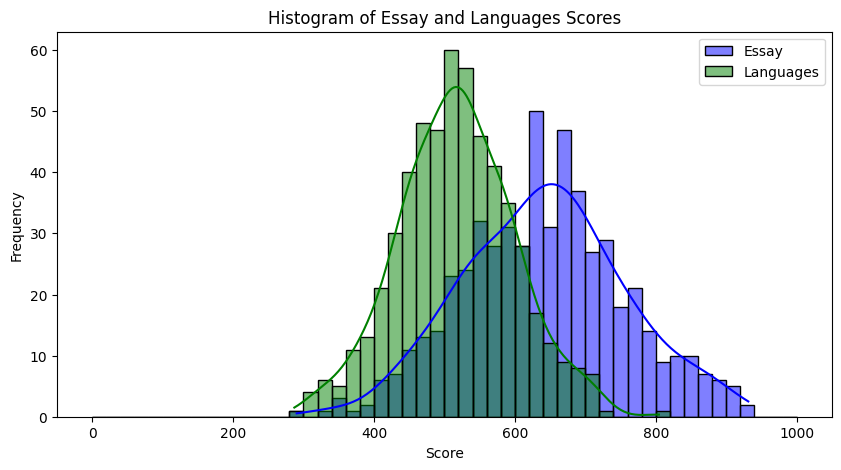

Essay: Average=641.19, Median=639.60 → Symmetrical
Languages: Average=517.47, Median=517.13 → Symmetrical


In [10]:
# Question 6: Histograms

bins = np.arange(0, 1020, 20)
plt.figure(figsize=(10, 5))

sns.histplot(df_enem_2023['Essay'], bins=bins, kde=True, color='blue', label='Essay', alpha=0.5)
sns.histplot(df_enem_2023['Languages'], bins=bins, kde=True, color='green', label='Languages', alpha=0.5)

plt.title("Histogram of Essay and Languages Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

for col in ['Essay', 'Languages']:
    mean, median = df_enem_2023[col].mean(), df_enem_2023[col].median()
    symmetry = "Symmetrical" if abs(mean - median) < 10 else "Positive Asymmetry" if mean > median else "Negative Asymmetry"
    print(f"{col}: Average={mean:.2f}, Median={median:.2f} → {symmetry}")


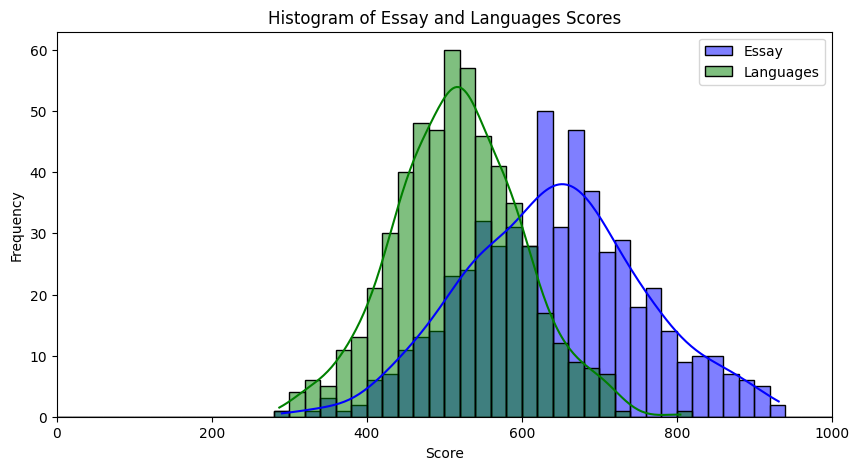

Essay: Average=641.19, Median=639.60 → Symmetrical
Languages: Average=517.47, Median=517.13 → Symmetrical


In [11]:
# Question 7: Adjusted histograms

bins = np.arange(0, 1020, 20)
plt.figure(figsize=(10, 5))

sns.histplot(df_enem_2023['Essay'], bins=bins, kde=True, color='blue', label='Essay', alpha=0.5)
sns.histplot(df_enem_2023['Languages'], bins=bins, kde=True, color='green', label='Languages', alpha=0.5)

plt.title("Histogram of Essay and Languages Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.xlim([0, 1000])
plt.legend()
plt.show()

for col in ['Essay', 'Languages']:
    mean, median = df_enem_2023[col].mean(), df_enem_2023[col].median()
    symmetry = "Symmetrical" if abs(mean - median) < 10 else "Positive Asymmetry" if mean > median else "Negative Asymmetry"
    print(f"{col}: Average={mean:.2f}, Median={median:.2f} → {symmetry}")


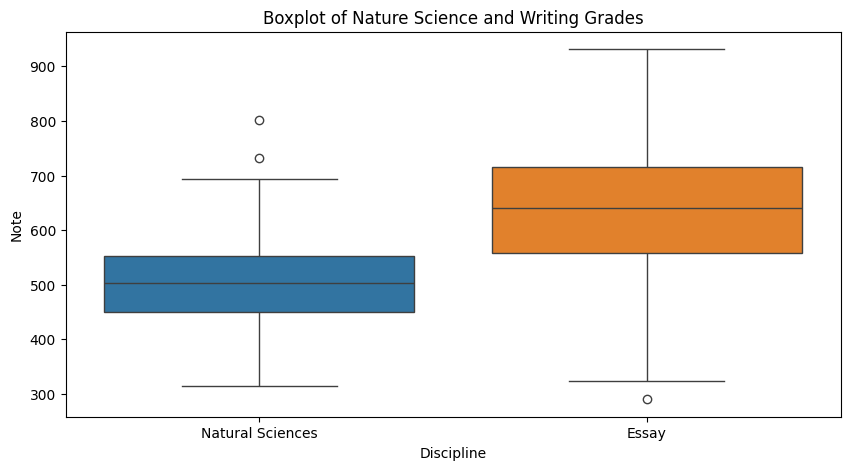


Natural Sciences:
Q1 (first quartile) = 450.00
Q3 (third quartile) = 552.26
IQR = 102.26
Lower limit = 296.60
Upper limit = 705.65
Outliers found: 2
Outlier examples: [802.0045683513, 732.5029639878] ...

Essay:
Q1 (first quartile) = 558.52
Q3 (third quartile) = 715.55
IQR = 157.03
Lower limit = 322.99
Upper limit = 951.09
Outliers found: 1
Outlier examples: [290.3086081677] ...


In [12]:
# Question 8: Boxplot Nature Sciences and Writing

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_enem_2023[['Natural Sciences', 'Essay']])
plt.title("Boxplot of Nature Science and Writing Grades")
plt.xlabel("Discipline")
plt.ylabel("Note")
plt.show()

for col in ['Natural Sciences', 'Essay']:
    Q1 = df_enem_2023[col].quantile(0.25)
    Q3 = df_enem_2023[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_enem_2023[(df_enem_2023[col] < lower_bound) | (df_enem_2023[col] > upper_bound)][col]

    print(f"\n{col}:")
    print(f"Q1 (first quartile) = {Q1:.2f}")
    print(f"Q3 (third quartile) = {Q3:.2f}")
    print(f"IQR = {IQR:.2f}")
    print(f"Lower limit = {lower_bound:.2f}")
    print(f"Upper limit = {upper_bound:.2f}")
    print(f"Outliers found: {outliers.count()}")

    if not outliers.empty:
        print(f"Outlier examples: {outliers.tolist()[:5]} ...")

In [13]:
# Question 9: Remove outliers

def remove_outliers(col):
    Q1 = df_enem_2023[col].quantile(0.25)
    Q3 = df_enem_2023[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_enem_2023[(df_enem_2023[col] >= lower_bound) & (df_enem_2023[col] <= upper_bound)]

df_no_outliers = remove_outliers('Natural Sciences')
df_no_outliers = remove_outliers('Essay')

mean_nature_science = df_enem_2023['Natural Sciences'].mean()
mean_essay = df_enem_2023['Essay'].mean()

mean_nature_science_no_outliers = df_no_outliers['Natural Sciences'].mean()
mean_essay_no_outliers = df_no_outliers['Essay'].mean()

nature_science_diff = (mean_nature_science - mean_nature_science_no_outliers) / mean_nature_science * 100
essay_diff = (mean_essay - mean_essay_no_outliers) / mean_essay * 100

print(f"Change in the grade point average for Natural Sciences: : {nature_science_diff:.2f}%")
print(f"Change in the writing average:  {essay_diff:.2f}%")

print("-" * 65)

if nature_science_diff > 5:
    print("Significant change in the Nature Sciences average!")
else:
    print("Non-significant change in the Nature Sciences average.")

if essay_diff > 5:
    print("Significant change in the Writing average!")
else:
    print("Non-significant change in the Writing average.")

Change in the grade point average for Natural Sciences: : 0.02%
Change in the writing average:  -0.10%
-----------------------------------------------------------------
Non-significant change in the Nature Sciences average.
Non-significant change in the Writing average.


In [14]:
# Question 10: Replacement of nulls

#df_enem_2023.dtypes
df_enem_2023 = df_enem_2023.drop('Gender', axis=1)

def impact_replacement(method):
    df_temp = df_enem_2023.fillna(df_enem_2023.aggregate(method))
    return abs(df_temp.mean() - df_enem_2023.mean()).sum(), abs(df_temp.std() - df_enem_2023.std()).sum()

average_impact = impact_replacement('mean')
median_impact = impact_replacement('median')
mode_impact = impact_replacement(lambda x: x.mode()[0] if not x.mode().empty else x.mean())

print("Impact on average and standard deviation (Average, Median, Mode):")
print(f"- Average Impact: {average_impact}")
print(f"- Median Impact: {median_impact}")
print(f"- Mode Impact: {mode_impact}")

Impact on average and standard deviation (Average, Median, Mode):
- Average Impact: (np.float64(0.0), np.float64(0.0))
- Median Impact: (np.float64(0.0), np.float64(0.0))
- Mode Impact: (np.float64(0.0), np.float64(0.0))
